## Задача
Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)

In [3]:
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

Визуализируем наш датасет:

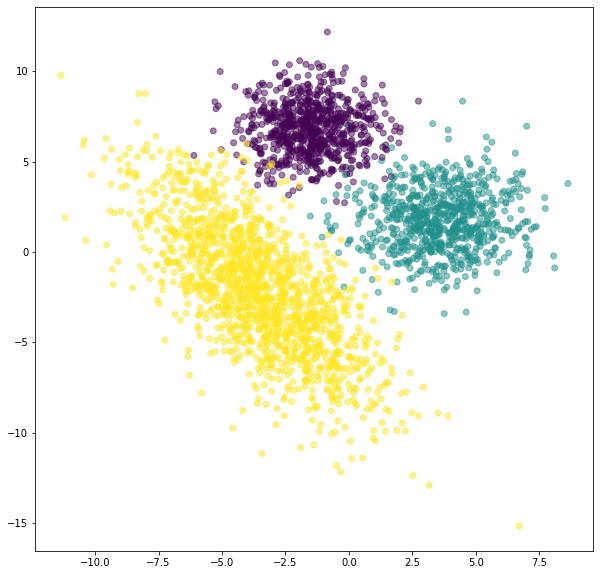

In [4]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [5]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

In [6]:
k_means = KMeans()

При создании объекта можно указать следующие параметры:

- n_clusters — число кластеров, на которое алгоритм будет делить набор данных;
- init — способ начальной инициализации центроидов кластров;
- random_state — фиксирует генерацию случайного числа для инициализации центроидов.

### Задание
Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [7]:
k_means = KMeans(n_clusters=3, random_state=42)

Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

In [8]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Обучив, мы можем получить центроиды кластеров:

In [9]:
k_means.cluster_centers_

array([[-3.1881624 , -2.90192586],
       [-2.38363475,  6.23391526],
       [ 3.63560063,  1.74586847]])

In [10]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


И узнать, в какой кластер попал каждый из объектов:

In [11]:
k_means.labels_

array([2, 2, 1, ..., 0, 0, 0])

### Задание
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

In [12]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

Для визуализации получившегося датасета можно использовать следующий код:

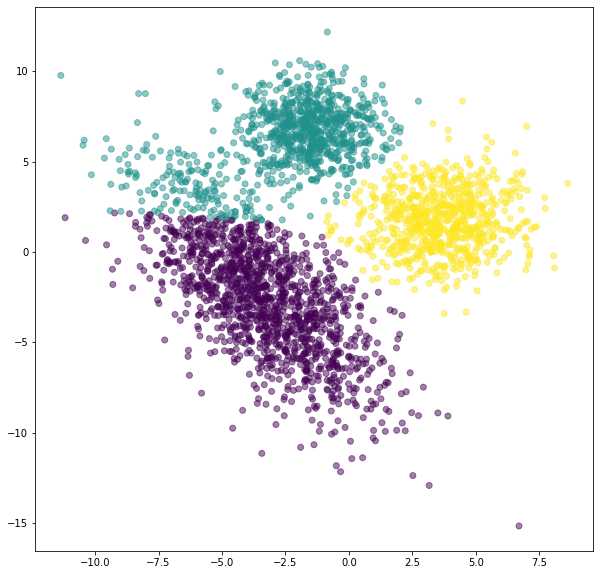

In [13]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

## ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('snsdata.csv')

In [17]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


В датасете для учеников предоставлены следующие признаки:

- Год выпуска
- Пол
- Возраст
- Количество друзей
- 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [19]:
X_3 = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [20]:
X_3 = StandardScaler().fit_transform(X_3)

In [21]:
k_means_2 = KMeans(n_clusters=9, random_state =123)
k_means_2.fit(X_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

Укажите номер кластера, в который попало меньше всего учеников.

In [22]:
_, counts = np.unique(k_means_2.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

20347 424 830 1 1026 932 644 5032 764 